<a href="https://colab.research.google.com/github/Pedro69491/ML-Algorithms/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
with open('/content/bodyfat.txt', 'r') as file:
  a = file.read()

#a
#a = a.replace('\n', ')
df = a.split('\n')
df = df[:252]
df = np.array(df)

df = np.array([np.array(i.strip().replace('     ','    ').replace('    ', '   ').replace('   ', '  ').replace('  ', ' ').split(' '), dtype=float) for i in df])

total_df = df

df = np.hstack((df[:,1].reshape(df.shape[0],1), df[:,7].reshape(df.shape[0],1)))



In [ ]:
class PCA:
  def __init__(self, df):
    self.df = df
    self.M = len(self.df)

  def mean_normalization(self):
    return np.mean(self.df, axis=0)
    
  def covariance(self):
    sum = 0
    mean = self.mean_normalization()
    for i in range(self.M):
      sum += np.matmul(np.transpose([self.mean_free()[i]]),[self.mean_free()[i]])
    return np.true_divide(sum, self.M-1)
  
  def eigenvalues(self, sigma):
    return np.linalg.eig(sigma)[0]
  
  def eigenvectors(self, sigma):
    return np.linalg.eig(sigma)[1]

  def mean_free(self):
    mean = self.mean_normalization()
    return np.array([np.subtract(self.df[i],mean) for i in range(self.M)])
    
  def z_space(self):
    eig_arr = self.eigenvectors(self.covariance())
    return np.array([np.array(i).dot(eig_arr) for i in self.mean_free()])



In [ ]:
a = PCA(df)

U = a.eigenvectors(a.covariance())
print(U.shape)
f_m = a.mean_free()
a_m = a.mean_normalization()
print(np.array([a_m]).T.shape)
vals = a.eigenvalues(a.covariance())



(2, 2)
(2, 1)


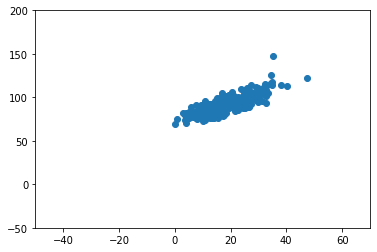

In [ ]:
#b)Project the original 2D data 
x1 = np.array([i[0] for i in df])
y1 = np.array([i[1] for i in df])
plt.scatter(x1, y1)
plt.ylim(-50,200)
plt.xlim(-50, 70)
plt.show()

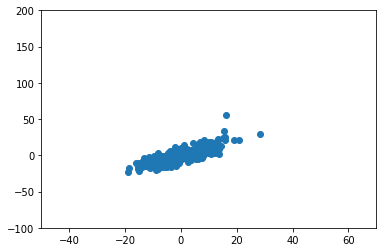

In [ ]:
#b)Project the new 2D data 
x2 = [i[0] for i in a.mean_free()]
y2 = [i[1] for i in a.mean_free()]

plt.scatter(x2, y2)
plt.ylim(-100,200)
plt.xlim(-50, 70)
plt.show()

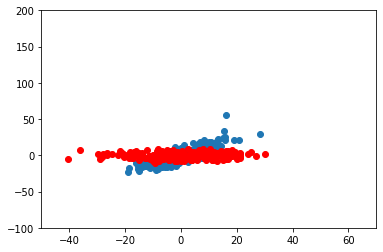

In [ ]:
#Define Z space
z = a.z_space()
y = np.array([i[0] for i in z])
x10 = np.array([i[1] for i in z])

plt.scatter(x2, y2)

plt.scatter(x10, y, c='red')
plt.ylim(-100,200)
plt.xlim(-50, 70)
plt.show()


(2, 2)
(252,)
(252,)


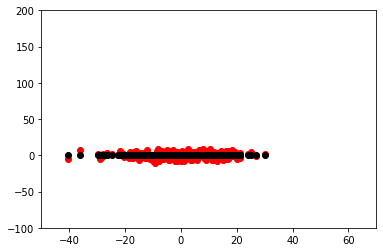

In [ ]:
#Project the original 2D data X to 1D

print(U.shape)

print(np.zeros(len(x10)).shape)
print(np.array(x10).shape)
plt.scatter(x10,y, c='red')
plt.scatter(x10, np.zeros(len(x10)), c='black')
plt.ylim(-100,200)
plt.xlim(-50, 70)
plt.show()



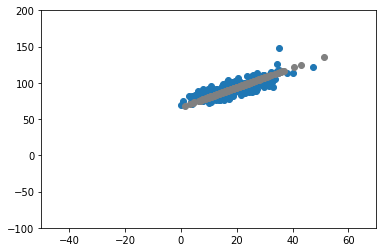

2.3754387098656142


In [ ]:
#Approximate the original data by M = 1

U_T = U[:, 1:2].T


x = np.array([U_T.dot(np.array([i]).T) for i in f_m])
x = np.squeeze(x, axis=1)

m10 = np.array([U_T.T*i + np.array([a_m]).T for i in x10])
m = np.array([U_T.T*i + np.array([a_m]).T for i in x])

x = [i[0]for i in np.squeeze(m)]
y = [i[1] for i in np.squeeze(m)]

x_t = [i[0]for i in np.squeeze(m10)]
y_t = [i[1] for i in np.squeeze(m10)]

plt.scatter(x1,y1)
plt.scatter(x_t, y_t, c='grey')
#plt.scatter(x,y)
#plt.scatter(x10, np.zeros(len(x)), c='black')
plt.ylim(-100,200)
plt.xlim(-50, 70)
plt.show()

rmse = np.sqrt(np.square(np.subtract(y_t,y1)).mean())
print(rmse)

[1.13242069e+03 1.78439305e+02 4.34083682e+01 1.20527579e+01
 1.12788773e+01 6.86459119e+00 4.45367140e+00 8.27545458e-06
 3.38197695e+00 2.40088242e-01 2.38466392e+00 1.04218201e+00
 1.35056733e+00 1.66936817e+00 1.91475482e+00]


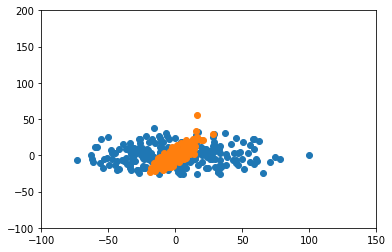

In [ ]:
#Compute a PCA for the complete data with all dimensions
b = PCA(total_df)
eig_vecs = b.eigenvectors(b.covariance())
eig_vals = b.eigenvalues(b.covariance())

print(eig_vals)
z_space = b.z_space()
#U_12_T = U[:,0:2].T


#x = np.array([U_12_T.dot(np.array([i]).T) for i in f_m])


#Define a two dimensional space based on the dimensions with bigger eigenvalues
x = [i[0] for i in z_space]
y = [i[1] for i in z_space]

# compare with with projected 2D mean_free data
plt.scatter(x,y)
plt.scatter(x2, y2)
plt.ylim(-100,200)
plt.xlim(-100, 150)
plt.show()

